In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from math import ceil, floor

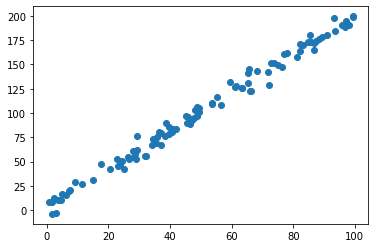

In [27]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

In [43]:
EPOCHS = 20
LEARNING_RATE = 0.0001
gamma = 0.75

In [44]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))

In [45]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    

In [46]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))  

In [47]:
theta0 = 1
theta1 = 1
vt0  = 0
vt1 = 0
for it in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    vt0 = gamma * vt0 + LEARNING_RATE * dt0
    vt1 = gamma * vt1 + LEARNING_RATE * dt1
    
    theta0 = theta0 - vt0
    theta1 = theta1 - vt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.0050426292352146 t1: 1.3302566842360009 cost: 758.4287349124052
t0: 1.012219276787528 t1: 1.7991775050833545 cost: 83.84216936223402
t0: 1.0186565601878872 t1: 2.2172904670846925 cost: 94.6875607290478
t0: 1.0224529659674926 t1: 2.4592647038955775 cost: 364.67791914992375
t0: 1.02306127187736 t1: 2.4892508941892535 cost: 411.60375968484243
t0: 1.0211288592238923 t1: 2.350345891125584 cost: 219.22725403493058
t0: 1.0179840133037752 t1: 2.130628571528663 cost: 45.0186014362398
t0: 1.01502619273476 t1: 1.9228367363846823 cost: 26.9279535905171
t0: 1.0132454838028206 t1: 1.7925867249943814 cost: 88.2804443769648
t0: 1.0129975246048744 t1: 1.763491770643908 cost: 109.6374626664667
t0: 1.0140442895007624 t1: 1.8198673121633155 cost: 70.78858148150239
t0: 1.0157807695679293 t1: 1.9217334144617733 cost: 27.20900153143352
t0: 1.0175262144561763 t1: 2.0240872501226836 cost: 17.93384610708564
t0: 1.0187676275018414 t1: 2.0930156745087127 cost: 31.181535798037906
t0: 1.0192870506184912 t1: 2

In [62]:
theta0 = 1
theta1 = 1
e = 0.0000001
E0 = 0
E1 = 0
for it in range(EPOCHS):
    
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    E0 = E0 * gamma + (1 - gamma) * dt0**2
    E1 = E1 * gamma + (1 - gamma) * dt1**2
    

    theta0 = theta0 - dt0 * LEARNING_RATE / np.sqrt(E0 + e) 
    theta1 = theta1 - dt1 *LEARNING_RATE / np.sqrt(E1 + e)
   
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.0001999999999842 t1: 1.0002 cost: 1668.6289594773793
t0: 1.0003511727105372 t1: 1.00035117264027 cost: 1668.1222203519799
t0: 1.0004826740520427 t1: 1.0004826738858448 cost: 1667.6814840545185
t0: 1.0006036020872966 t1: 1.0006036018103852 cost: 1667.2762369492268
t0: 1.0007180845838533 t1: 1.0007180841859469 cost: 1666.8926356509128
t0: 1.0008283562826297 t1: 1.0008283557559028 cost: 1666.523185838892
t0: 1.0009357577289826 t1: 1.0009357570672006 cost: 1666.163392194153
t0: 1.0010411475390242 t1: 1.0010411467371052 cost: 1665.8103756727357
t0: 1.0011451005136538 t1: 1.0011450995674094 cost: 1665.4622090431199
t0: 1.0012480135042752 t1: 1.0012480124102385 cost: 1665.117561823117
t0: 1.0013501665919218 t1: 1.001350165347222 cost: 1664.7754950949677
t0: 1.0014517606132873 t1: 1.001451759215551 cost: 1664.4353356525157
t0: 1.0015529412638573 t1: 1.0015529397111265 cost: 1664.0965951684027
t0: 1.0016538151443939 t1: 1.0016538134350592 cost: 1663.7589163826963
t0: 1.0017544607457798 t1